<a href="https://colab.research.google.com/github/RFdream/ML100-Days/blob/master/Data/Day077_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
import os
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import SGD

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 162s 1us/step


In [0]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """
    Try to build your own model
    """

    input_layer = Input([x_train.shape[-1]])
    x = Dense(units=512, activation="relu")(input_layer)
    x = Dense(units=256, activation="relu")(x)
    x = Dense(units=128, activation="relu")(x)
    output_layer = Dense(units=10, activation="softmax")(x)
    
    model = Model(inputs=[input_layer], outputs=[output_layer])
    return model

model = build_mlp()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
"""
Compile your model
"""
optimizer = SGD(lr=1e-3)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [7]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 217us/step - loss: 2.2556 - acc: 0.1853 - val_loss: 2.2095 - val_acc: 0.2233
Epoch 2/500
50000/50000 [==============================] - 11s 227us/step - loss: 2.1738 - acc: 0.2412 - val_loss: 2.1434 - val_acc: 0.2536
Epoch 3/500
50000/50000 [==============================] - 11s 224us/step - loss: 2.1169 - acc: 0.2615 - val_loss: 2.0926 - val_acc: 0.2767
Epoch 4/500
50000/50000 [==============================] - 11s 225us/step - loss: 2.0728 - acc: 0.2769 - val_loss: 2.0543 - val_acc: 0.2870
Epoch 5/500
50000/50000 [==============================] - 11s 227us/step - loss: 2.0384 - acc: 0.2887 - val_loss: 2.0233 - val_acc: 0.2980
Epoch 6/500
50000/50000 [==============================] - 11s 227us/step - loss: 2.0101 - acc: 0.2960 - val_loss: 1.9979 - val_acc: 0.3068
Epoch 7/500
50000/50000 [==============================] - 11s

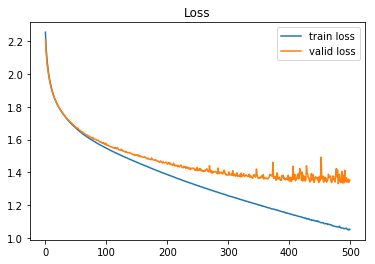

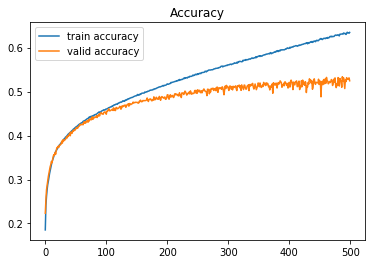

In [8]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()